In [202]:
import pandas as pd

import matplotlib.pyplot as plt

## Importing all the datasets...

In [203]:
# orders dataset

orders_df = pd.read_csv(r"C:\Users\user\Documents\200l_2nd_sem\CSC 298\tech_crush\datasets\Pizza+Place+Sales\pizza_sales\orders.csv")

# order_details dataset

order_details_df = pd.read_csv(r"C:\Users\user\Documents\200l_2nd_sem\CSC 298\tech_crush\datasets\Pizza+Place+Sales\pizza_sales\order_details.csv")

# pizzas dataset

pizzas_df = pd.read_csv(r"C:\Users\user\Documents\200l_2nd_sem\CSC 298\tech_crush\datasets\Pizza+Place+Sales\pizza_sales\pizzas.csv")

# pizza_types dataset

pizza_types_df = pd.read_csv(r"C:\Users\user\Documents\200l_2nd_sem\CSC 298\tech_crush\datasets\Pizza+Place+Sales\pizza_sales\pizza_types.csv", encoding="latin1") # the encoding format here is not purely UTF-8

## Let's do a summary of the datasets...

In [204]:
# orders DataFrame

orders_df.head()

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30


In [205]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   order_id  21350 non-null  int64 
 1   date      21350 non-null  object
 2   time      21350 non-null  object
dtypes: int64(1), object(2)
memory usage: 500.5+ KB


In [206]:
# order_details DataFrame

order_details_df.head()

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


In [207]:
order_details_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_details_id  48620 non-null  int64 
 1   order_id          48620 non-null  int64 
 2   pizza_id          48620 non-null  object
 3   quantity          48620 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [208]:
# pizzas DataFrame

pizzas_df.head()

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


In [209]:
pizzas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pizza_id       96 non-null     object 
 1   pizza_type_id  96 non-null     object 
 2   size           96 non-null     object 
 3   price          96 non-null     float64
dtypes: float64(1), object(3)
memory usage: 3.1+ KB


In [210]:
# pizza_types DataFrame

pizza_types_df.head()

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


In [211]:
pizza_types_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   pizza_type_id  32 non-null     object
 1   name           32 non-null     object
 2   category       32 non-null     object
 3   ingredients    32 non-null     object
dtypes: object(4)
memory usage: 1.1+ KB


In [212]:
# They all seem to be without null values

## Let's MERGE the four datasets into One DataFrame...

In [213]:
# Merging the orders DF and the order_details DF:

merged_pizza_df = pd.merge(order_details_df, orders_df, on="order_id", how="left")
merged_pizza_df.head()

,order_details_id,order_id,pizza_id,quantity,date,time
0,1,1,hawaiian_m,1,2015-01-01,11:38:36
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40
2,3,2,five_cheese_l,1,2015-01-01,11:57:40
3,4,2,ital_supr_l,1,2015-01-01,11:57:40
4,5,2,mexicana_m,1,2015-01-01,11:57:40


In [214]:
# Merging the pizzas DF to the merged_pizza DF

merged_pizza_df = pd.merge(merged_pizza_df, pizzas_df, on="pizza_id", how="left")
merged_pizza_df.head()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,classic_dlx,M,16.00
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,five_cheese,L,18.50
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,ital_supr,L,20.75
4,5,2,mexicana_m,1,2015-01-01,11:57:40,mexicana,M,16.00


In [215]:
# Merging the pizza_types DF to the merged_pizza DF

merged_pizza_df = pd.merge(merged_pizza_df, pizza_types_df, on="pizza_type_id", how="left")
merged_pizza_df.head()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,5,2,mexicana_m,1,2015-01-01,11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


## Viewing the summary of the overall DataFrame now...

In [216]:
merged_pizza_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_details_id  48620 non-null  int64  
 1   order_id          48620 non-null  int64  
 2   pizza_id          48620 non-null  object 
 3   quantity          48620 non-null  int64  
 4   date              48620 non-null  object 
 5   time              48620 non-null  object 
 6   pizza_type_id     48620 non-null  object 
 7   size              48620 non-null  object 
 8   price             48620 non-null  float64
 9   name              48620 non-null  object 
 10  category          48620 non-null  object 
 11  ingredients       48620 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 4.5+ MB


In [217]:
# Checking for null values

merged_pizza_df.isna().sum()

order_details_id    0
order_id            0
pizza_id            0
quantity            0
date                0
time                0
pizza_type_id       0
size                0
price               0
name                0
category            0
ingredients         0
dtype: int64

In [218]:
# Checking for duplicates

merged_pizza_df.duplicated().sum()

np.int64(0)

- NO null values in the entire DataFrame
- NO duplicates
- All EXCEPT the **date** and **time** columns seem to be in the right data format

## Our data seems clean enough...

In [219]:
merged_pizza_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_details_id  48620 non-null  int64  
 1   order_id          48620 non-null  int64  
 2   pizza_id          48620 non-null  object 
 3   quantity          48620 non-null  int64  
 4   date              48620 non-null  object 
 5   time              48620 non-null  object 
 6   pizza_type_id     48620 non-null  object 
 7   size              48620 non-null  object 
 8   price             48620 non-null  float64
 9   name              48620 non-null  object 
 10  category          48620 non-null  object 
 11  ingredients       48620 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 4.5+ MB


## 1. Total Revenue

In [220]:
merged_pizza_df.head(3)

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."


**a.** We don't have a Sales column from which we'll calculate the total revenue made. LET'S CREATE ONE...

In [221]:
# sales column = price * quantity

merged_pizza_df["sales"] = merged_pizza_df["price"] * merged_pizza_df["quantity"]

merged_pizza_df.sample(3)

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients,sales
5386,5387,2380,napolitana_m,1,2015-02-09,16:22:26,napolitana,M,16.00,The Napolitana Pizza,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",16.00
47186,47187,20739,pepperoni_m,1,2015-12-18,18:06:56,pepperoni,M,12.50,The Pepperoni Pizza,Classic,"Mozzarella Cheese, Pepperoni",12.50
9629,9630,4220,mediterraneo_l,1,2015-03-12,18:55:05,mediterraneo,L,20.25,The Mediterranean Pizza,Veggie,"Spinach, Artichokes, Kalamata Olives, Sun-drie...",20.25


In [222]:
total_revenue = merged_pizza_df["sales"].sum()
total_revenue

np.float64(817860.05)

In [223]:
print(f"===TOTAL REVENUE=== \n${total_revenue:.2f}")

===TOTAL REVENUE=== 
$817860.05


## 2. Total Quantity Sold

In [224]:
total_quantity = merged_pizza_df["quantity"].sum()

print(f"===Total Pizzas Sold=== \n{total_quantity} boxes")

===Total Pizzas Sold=== 
49574 boxes


## 3. Total Orders

**a.** The order_id column contains all transactions made... Every order has a unique id, irrespective of how many items were bought.

In [225]:
total_orders = merged_pizza_df["order_id"].value_counts().count() # let's count each unique order id...

print(f"===Total Orders=== \n{total_orders} orders")

===Total Orders=== 
21350 orders


## 4. Total Pizza Types Sold

NO TWO pizzas have the same:
- name
- pizza_type_id

In [226]:
# Using the pizza_type_id column

pizza_types_count = merged_pizza_df["pizza_type_id"].value_counts().count()

print(f"===Total Pizza Types Being Sold=== \n{pizza_types_count} types")

===Total Pizza Types Being Sold=== 
32 types


## 5. Average Pizza Price

Using the **price** column, we can get our average price

**a.** We only need the unique price of each pizza, not duplicates of the same item... We can remove the duplicates while trying to find our mean price for ***each pizza***

In [227]:
average_price = merged_pizza_df.drop_duplicates(subset=["pizza_id"])["price"].mean()

print(f"===Average Pizza Price=== \n${average_price:.2f}")

===Average Pizza Price=== 
$16.51


## 6. Peak Hours of Sale

**a.** We need to extract the hour from the time column

**b.** First though, let's create a single column for our date and time, so we can easily extract date_time properties

In [228]:
# Concatenate the date and time columns and convert to datetime format

merged_pizza_df["date_time"] = pd.to_datetime(merged_pizza_df["date"] + " " + merged_pizza_df["time"])

merged_pizza_df.head()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients,sales,date_time
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25,2015-01-01 11:38:36
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",16.00,2015-01-01 11:57:40
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",18.50,2015-01-01 11:57:40
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",20.75,2015-01-01 11:57:40
4,5,2,mexicana_m,1,2015-01-01,11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",16.00,2015-01-01 11:57:40


In [229]:
# hour column

merged_pizza_df["hour"] = merged_pizza_df["date_time"].dt.hour
merged_pizza_df.sample(1)

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients,sales,date_time,hour
9112,9113,3997,bbq_ckn_s,1,2015-03-08,20:55:45,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",12.75,2015-03-08 20:55:45,20


In [230]:
# Finding the sales for every hour

hourly_sales = merged_pizza_df.groupby("hour")["sales"].sum()

hourly_sales

hour
9         83.00
10       303.65
11     44935.80
12    111877.90
13    106065.70
14     59201.40
15     52992.30
16     70055.40
17     86237.45
18     89296.85
19     72628.90
20     58215.40
21     42029.80
22     22815.15
23      1121.35
Name: sales, dtype: float64

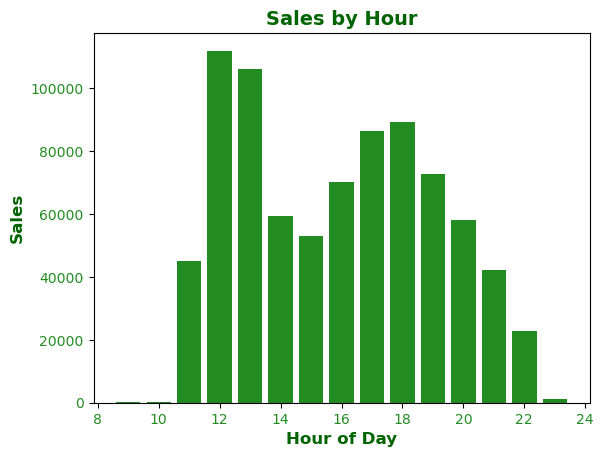

In [231]:
# Visualization

plt.bar(hourly_sales.index, hourly_sales.values, color="forestgreen")

# Titles

plt.title("Sales by Hour", color="darkgreen", fontsize="14", fontweight="bold")
plt.xlabel("Hour of Day", color="darkgreen", fontsize="12", fontweight="bold")
plt.ylabel("Sales", color="darkgreen", fontsize="12", fontweight="bold")

# Working on the labels

plt.xticks(fontsize="10", color="forestgreen")
plt.yticks(fontsize="10", color="forestgreen")

plt.show()

- Peak Hours fall on **midday (*12-2pm*)** and **closing hours (*5-7pm*)**. This could be because people need a quick lunch during working hours, and there is the considerable lot that takes supply home for a quick dinner.
- Major significance should be placed on the **midday rush**, which alone generated over $200,000 in annual revenue, accounting for more than 25 percent the entire revenue for the year.
- The peak hours should guide marketing strategies, and even staffing. The heat of demand falls on midday and early evening hours; Staff should be heavily on ground during these times.
- The lowest sales occur between 9-11am, and 11pm-12am. Quite understandably, late-night sales are low since *most* people are asleep after 10pm. Nonetheless for the time period 9-11am, it is likely that customers are occupied with work activities. This suggests that the primary customer base consists of working individuals.

## 7. Total Sales Made on Each Day

In [232]:
# Day column

merged_pizza_df["day"] = merged_pizza_df["date_time"].dt.day_name()

merged_pizza_df.sample(3)

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients,sales,date_time,hour,day
35048,35049,15473,spicy_ital_l,1,2015-09-16,11:50:09,spicy_ital,L,20.75,The Spicy Italian Pizza,Supreme,"Capocollo, Tomatoes, Goat Cheese, Artichokes, ...",20.75,2015-09-16 11:50:09,11,Wednesday
3904,3905,1737,ckn_alfredo_m,1,2015-01-30,13:41:21,ckn_alfredo,M,16.75,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",16.75,2015-01-30 13:41:21,13,Friday
40824,40825,17986,big_meat_s,1,2015-11-02,21:46:19,big_meat,S,12.00,The Big Meat Pizza,Classic,"Bacon, Pepperoni, Italian Sausage, Chorizo Sau...",12.00,2015-11-02 21:46:19,21,Monday


In [233]:
# Finding the sales per weekday

# first setting an order for the day column to mon-sun for the bar chart
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# sales by weekday
sales_per_day = merged_pizza_df.groupby("day")["sales"].sum()

# reindexing
sales_per_day = sales_per_day.reindex(day_order)

sales_per_day

day
Monday       107329.55
Tuesday      114133.80
Wednesday    114408.40
Thursday     123528.50
Friday       136073.90
Saturday     123182.40
Sunday        99203.50
Name: sales, dtype: float64

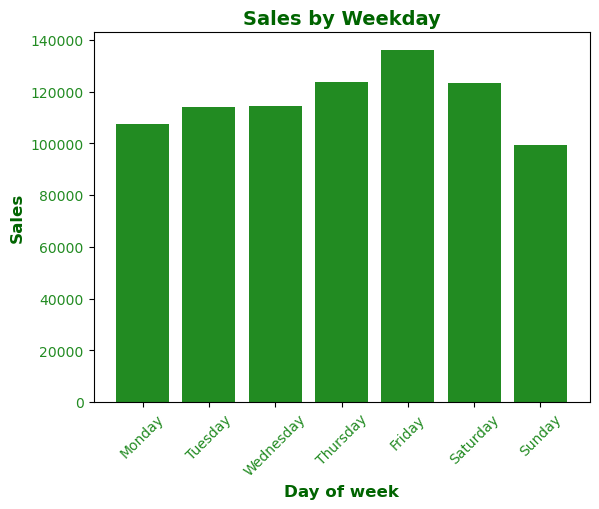

In [234]:
# Visualization

plt.bar(sales_per_day.index, sales_per_day.values, color="forestgreen")

# Titles

plt.title("Sales by Weekday", color="darkgreen", fontsize="14", fontweight="bold")
plt.xlabel("Day of week", color="darkgreen", fontsize="12", fontweight="bold")
plt.ylabel("Sales", color="darkgreen", fontsize="12", fontweight="bold")

# Working on the labels

plt.xticks(fontsize="10", color="forestgreen", rotation=45)
plt.yticks(fontsize="10", color="forestgreen")

plt.show()

**Day with the highest sales** -- **FRIDAY**

- **Friday** has the **highest sales** by a significant margin of more than $100,000. This is typical for pizza places as people tend to order more for weekend enjoyment. Hence, the business should ensure maximum staffing and inventory on Fridays
- Sales **consistently** build throughout the week (we see a steady rise from Monday to Friday).
- There is however, a consistent drop during the weekends. A possible reason could be that weekends tend to be "free-er" for families, and there'll be more chances of them actually making meals at home.

## 8. Top 5 Best-selling Pizzas

In [235]:
merged_pizza_df.sample(3)

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients,sales,date_time,hour,day
3735,3736,1656,the_greek_m,1,2015-01-28,18:15:57,the_greek,M,16.00,The Greek Pizza,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic...",16.00,2015-01-28 18:15:57,18,Wednesday
3565,3566,1582,hawaiian_s,1,2015-01-27,16:34:55,hawaiian,S,10.50,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",10.50,2015-01-27 16:34:55,16,Tuesday
37304,37305,16464,soppressata_l,1,2015-10-04,17:31:19,soppressata,L,20.75,The Soppressata Pizza,Supreme,"Soppressata Salami, Fontina Cheese, Mozzarella...",20.75,2015-10-04 17:31:19,17,Sunday


In [236]:
# Group the the quantity that's been ordered by the pizza names

top_5_pizzas = merged_pizza_df.groupby("name")["quantity"].sum().sort_values(ascending=False).head()

top_5_pizzas

name
The Classic Deluxe Pizza      2453
The Barbecue Chicken Pizza    2432
The Hawaiian Pizza            2422
The Pepperoni Pizza           2418
The Thai Chicken Pizza        2371
Name: quantity, dtype: int64

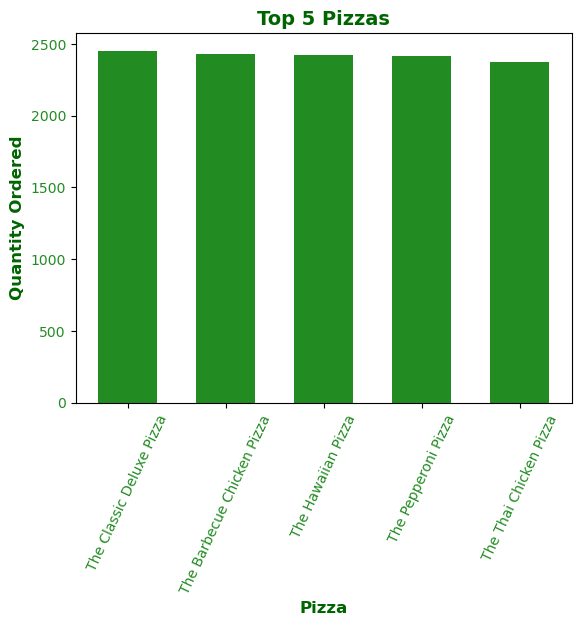

In [237]:
# Visualization of the top 5 pizzas

plt.bar(top_5_pizzas.index, top_5_pizzas.values, color="forestgreen", width=0.6)

# Titles

plt.title("Top 5 Pizzas", color="darkgreen", fontsize="14", fontweight="bold")
plt.xlabel("Pizza", color="darkgreen", fontsize="12", fontweight="bold")
plt.ylabel("Quantity Ordered", color="darkgreen", fontsize="12", fontweight="bold")

# Working on the labels

plt.xticks(fontsize="10", color="forestgreen", rotation=65)
plt.yticks(fontsize="10", color="forestgreen")

plt.show()

- These are all consistently close top performers. The small gaps suggest customers like variety in you top tier.
- The Classic Deluxe Pizza is the top product. Likewise, there seems to be no **extreme specialty pizzas** in the top 5. Either the customers prefer a conservative taste, or the specialty pizzas are not catchy enough to spark a massive demand. The business should look into more creative recipes that would spark customer interest.
- Ensure consistent quality on these top pizzas to avoid drop in demand.

## 9. Monthly Sales

In [238]:
# Month column

merged_pizza_df["month"] = merged_pizza_df["date_time"].dt.month_name()

merged_pizza_df.sample(3)

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients,sales,date_time,hour,day,month
44132,44133,19396,spinach_fet_s,1,2015-11-26,21:32:07,spinach_fet,S,12.00,The Spinach and Feta Pizza,Veggie,"Spinach, Mushrooms, Red Onions, Feta Cheese, G...",12.00,2015-11-26 21:32:07,21,Thursday,November
34088,34089,15050,classic_dlx_m,1,2015-09-09,14:03:48,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",16.00,2015-09-09 14:03:48,14,Wednesday,September
29508,29509,13037,ckn_alfredo_l,1,2015-08-06,12:10:30,ckn_alfredo,L,20.75,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",20.75,2015-08-06 12:10:30,12,Thursday,August


In [239]:
# Sales by month
monthly_sales = merged_pizza_df.groupby("month")["sales"].sum()

# resetting the index
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
monthly_sales = monthly_sales.reindex(month_order)

monthly_sales

month
January      69793.30
February     65159.60
March        70397.10
April        68736.80
May          71402.75
June         68230.20
July         72557.90
August       68278.25
September    64180.05
October      64027.60
November     70395.35
December     64701.15
Name: sales, dtype: float64

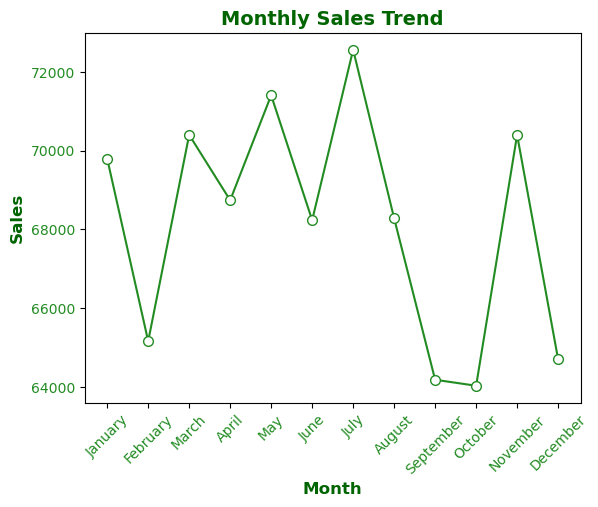

In [243]:
# Visualization

plt.plot(monthly_sales.index, monthly_sales.values, color="forestgreen", marker="o", markersize=7, markerfacecolor="white", markeredgecolor="forestgreen")

# Titles
plt.title("Monthly Sales Trend", color="darkgreen", fontsize="14", fontweight="bold")

plt.xlabel("Month", color="darkgreen", fontsize="12", fontweight="bold")
plt.ylabel("Sales", color="darkgreen", fontsize="12", fontweight="bold")

plt.xticks(fontsize="10", color="forestgreen", rotation=45)
plt.yticks(fontsize="10", color="forestgreen")

plt.show()

- Sales stay within a tight range (~64,000 to ~72,000)
- July shows the highest sales (clear summer peak)
- **Possible reasons:**
1. Summer vacations
2. Outdoor events/parties
3. Better weather for pizza delivery
4. Family gatherings

## 10. Are there pizza types that are not doing well on the menu?

In [244]:
merged_pizza_df.sample(2)

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients,sales,date_time,hour,day,month
39150,39151,17257,napolitana_s,1,2015-10-20,18:46:51,napolitana,S,12.0,The Napolitana Pizza,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",12.0,2015-10-20 18:46:51,18,Tuesday,October
19663,19664,8645,pep_msh_pep_s,1,2015-05-25,13:05:20,pep_msh_pep,S,11.0,"The Pepperoni, Mushroom, and Peppers Pizza",Classic,"Pepperoni, Mushrooms, Green Peppers",11.0,2015-05-25 13:05:20,13,Monday,May


In [246]:
# grouping by pizza_type_id, we want to find the least-ordered pizzas
low_sellers = merged_pizza_df.groupby('pizza_type_id')['quantity'].sum().sort_values().head(5) #ascending order

low_sellers

pizza_type_id
brie_carre      490
mediterraneo    934
calabrese       937
spinach_supr    950
soppressata     961
Name: quantity, dtype: int64

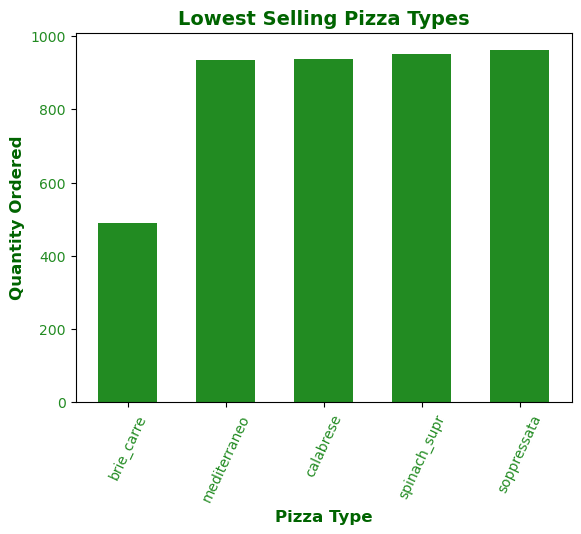

In [247]:
# Visualization of the low_selling pizza types

plt.bar(low_sellers.index, low_sellers.values, color="forestgreen", width=0.6)

# Titles

plt.title("Lowest Selling Pizza Types", color="darkgreen", fontsize="14", fontweight="bold")
plt.xlabel("Pizza Type", color="darkgreen", fontsize="12", fontweight="bold")
plt.ylabel("Quantity Ordered", color="darkgreen", fontsize="12", fontweight="bold")

# Working on the labels

plt.xticks(fontsize="10", color="forestgreen", rotation=65)
plt.yticks(fontsize="10", color="forestgreen")

plt.show()

- The top 5 low selling pizzas all rank below 1000 units in demand.